In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("vgsales.csv")

In [12]:
df = df[df["Year"].notnull()]
df = df[df["Genre"].notnull()]
df = df.dropna(axis=0)
df.isnull().any().any()

False

In [13]:
df.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [14]:
group = df.groupby("Year").agg(["mean","count", "median"]).reset_index()
group

Year          Rank                 NA_Sales               EU_Sales  \
                    mean count   median      mean count median      mean   
0   1980.0   3314.000000     9   2671.0  1.176667     9  0.720  0.074444   
1   1981.0   4141.043478    46   4244.5  0.726087    46  0.435  0.042609   
2   1982.0   4144.055556    36   3734.0  0.747778    36  0.500  0.045833   
3   1983.0   3338.764706    17   2674.0  0.456471    17  0.430  0.047059   
4   1984.0   1636.500000    14   1281.0  2.377143    14  0.345  0.150000   
5   1985.0   3964.642857    14   2041.5  2.409286    14  0.285  0.338571   
6   1986.0   1713.619048    21   1429.0  0.595238    21  0.320  0.135238   
7   1987.0   3418.812500    16   2352.0  0.528750    16  0.370  0.088125   
8   1988.0   2478.733333    15   1248.0  1.591333    15  0.590  0.439333   
9   1989.0   2362.117647    17   1144.0  2.655882    17  0.660  0.496471   
10  1990.0   1569.125000    16   1236.0  1.591250    16  0.675  0.476875   
11  1991.0   5190.756098    41   5035.0  0.311220    41  0.000  0.096341   
12  1992.0   4858.744186    43   2635.0  0.787674    43  0.010  0.272326   
13  1993.0   6312.700000    60   5249.5  0.252000    60  0.000  0.077500   
14  1994.0   7180.917355   121   6310.0  0.232645   121  0.000  0.122975   
15  1995.0   8582.621005   219   9243.0  0.113333   219  0.000  0.068037   
16  1996.0   7268.714829   263   7227.0  0.329886   263  0.040  0.179696   
17  1997.0   6563.937716   289   6219.0  0.327855   289  0.070  0.167197   
18  1998.0   6922.137203   379   6577.0  0.338681   379  0.080  0.176517   
19  1999.0   6470.544379   338   5848.5  0.372959   338  0.130  0.185414   
20  2000.0   6809.088825   349   6648.0  0.270745   349  0.100  0.151146   
21  2001.0   7026.493776   482   6670.0  0.360954   482  0.115  0.196867   
22  2002.0   8239.068758   829   8385.0  0.260784   829  0.090  0.132376   
23  2003.0   7885.154839   775   7669.0  0.249794   775  0.110  0.133948   
24  2004.0   7630.733871   744   7457.5  0.294086   744  0.110  0.142366   
25  2005.0   8205.422009   936   8270.5  0.258098   936  0.100  0.129872   
26  2006.0   9487.691468  1008  10191.0  0.261032  1008  0.050  0.128214   
27  2007.0   8611.944213  1201   8741.0  0.259101  1201  0.090  0.133372   
28  2008.0   8464.990896  1428   8441.0  0.246106  1428  0.090  0.129132   
29  2009.0   8679.398323  1431   8676.0  0.236792  1431  0.090  0.133885   
30  2010.0   8778.667462  1257   8966.0  0.242037  1257  0.080  0.140469   
31  2011.0   8782.597711  1136   9207.5  0.212148  1136  0.070  0.147280   
32  2012.0   8436.007634   655   8263.0  0.236534   655  0.040  0.181313   
33  2013.0   8055.597070   546   7825.0  0.283462   546  0.050  0.230403   
34  2014.0   8290.924138   580   8462.0  0.227534   580  0.050  0.216603   
35  2015.0   9797.796417   614  11165.0  0.167459   614  0.010  0.159137   
36  2016.0  11402.043860   342  12933.0  0.066257   342  0.000  0.078246   
37  2017.0  15692.666667     3  16244.0  0.000000     3  0.000  0.000000   
38  2020.0   5959.000000     1   5959.0  0.270000     1  0.270  0.000000   

                 JP_Sales              Other_Sales              Global_Sales  \
   count median      mean count median        mean count median         mean   
0      9  0.040  0.000000     9  0.000    0.013333     9  0.010     1.264444   
1     46  0.030  0.000000    46  0.000    0.006957    46  0.000     0.777609   
2     36  0.030  0.000000    36  0.000    0.008611    36  0.010     0.801667   
3     17  0.030  0.476471    17  0.000    0.008235    17  0.010     0.987647   
4     14  0.090  1.019286    14  0.975    0.050000    14  0.020     3.597143   
5     14  0.060  1.040000    14  0.470    0.065714    14  0.005     3.852857   
6     21  0.020  0.943333    21  1.000    0.091905    21  0.010     1.765238   
7     16  0.020  0.726875    16  0.435    0.012500    16  0.000     1.358750   
8     15  0.140  1.050667    15  0.760    0.066000    15  0.010     3.148000   
9     17 

In [15]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Current size: [12, 9]


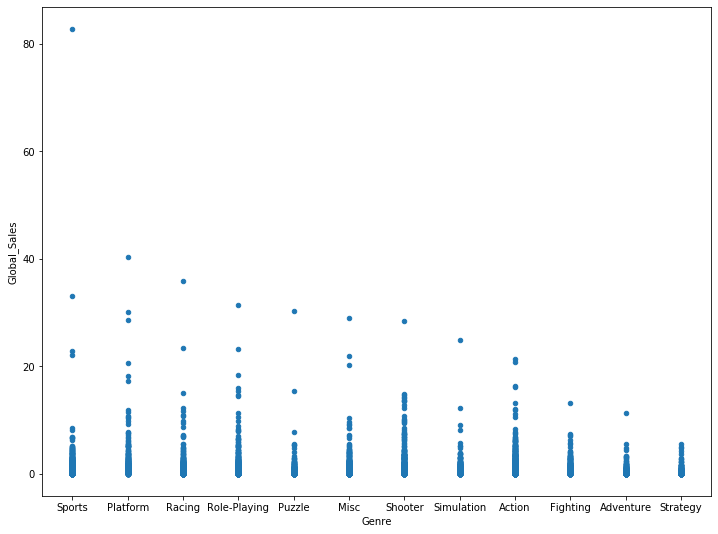

In [18]:
df.plot.scatter(x = "Genre", y = "Global_Sales")


# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Prints: [8.0, 6.0]
print("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9



In [19]:
hist_2008 = df[ df["Year"] == 2008]
hist_2008

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
88,89,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
...,...,...,...,...,...,...,...,...,...,...,...
16575,16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16580,16583,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01


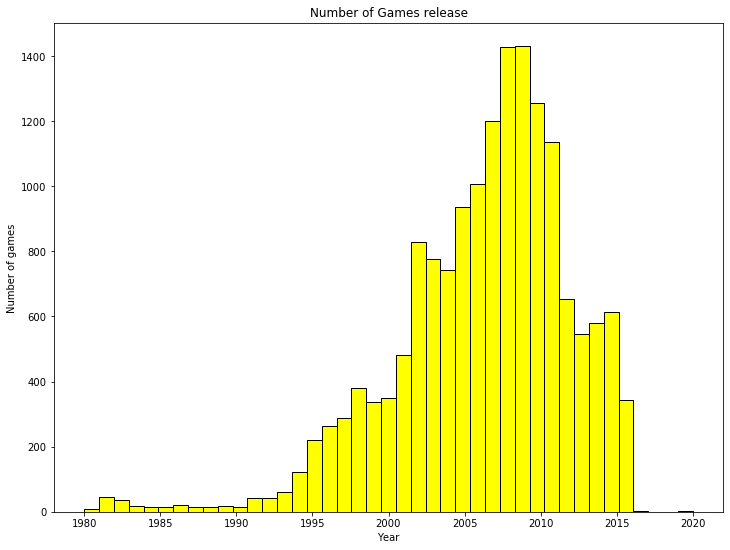

In [29]:


num_years = df["Year"].max() - df["Year"].min() + 1
plt.hist(df["Year"], bins= 41, color="yellow", edgecolor="black")
plt.title("Number of Games release")
plt.xlabel("Year")
plt.ylabel("Number of games");
